In [32]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

# **Data Preprocessing**

In [2]:
# Define arabic labels 
arabic_labels = [
    'alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh'
]

In [3]:
data = ['/kaggle/input/arabic-chars-mnist']
train_path = '/kaggle/input/arabic-chars-mnist/train'
test_path = '/kaggle/input/arabic-chars-mnist/test'

In [4]:
# Initialize train and test lists
train_info = []
test_info = []

# Get list of files in training directory
train_images = os.listdir(train_path)

# Append file information to the train list
for img in train_images:
    label = next((label for label in arabic_labels if label in img), None)
    train_info.append({'Image': img, 'Label': label})

# Get list of files in testing directory
test_images = os.listdir(test_path)

# Append file information to the test list
for img_t in test_images:
    label = next((label for label in arabic_labels if label in img_t), None)
    test_info.append({'Image': img_t, 'Label': label})

# Create train dataframe
train_df = pd.DataFrame(train_info)

# Create test dataframe
test_df = pd.DataFrame(test_info)

In [5]:
train_df.head()

,Image,Label
0,alef1792.jpg,alef
1,ain367.jpg,ain
2,beh9646.jpg,beh
3,teh3604.jpg,teh
4,teh10548.jpg,teh


In [6]:
train_df.shape

(13440, 2)

In [7]:
test_df.head() 

,Image,Label
0,alef1792.jpg,alef
1,dad1316.jpg,dad
2,teh2861.jpg,teh
3,beh226.jpg,beh
4,seen2095.jpg,seen


In [8]:
test_df.shape

(3360, 2)

In [9]:
test_df.isnull().sum()

Image    0
Label    0
dtype: int64

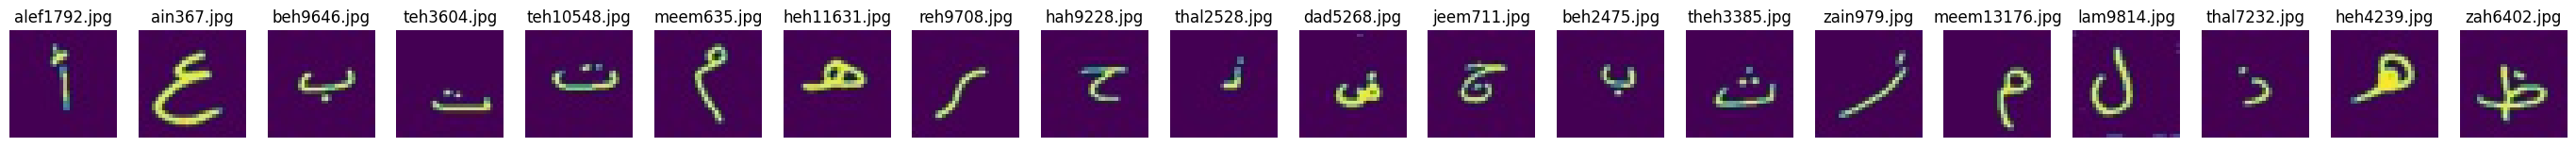

In [10]:
num_images= 20

plt.figure(figsize=(35, 12))

for i in range(num_images):
    
    img_name = train_images[i]
    
    # Load the image using PIL
    image_path = os.path.join(train_path, img_name)
    image = Image.open(image_path)
    
    # Plot the image
    plt.subplot(1, num_images, i+1)
    plt.imshow(image)
    plt.title(img_name)
    plt.axis('off')

In [11]:
train_imgs = []
for img in train_df['Image']:
    image_path = os.path.join(train_path, img)
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize image to (28, 28)
    image = np.array(image) / 255.0  # Normalize pixel values
    train_imgs.append(image)

In [12]:
test_imgs = []
for img in test_df['Image']:
    image_path = os.path.join(test_path, img)
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize image to (28, 28)
    image = np.array(image) / 255.0  # Normalize pixel values
    test_imgs.append(image)

In [13]:
# Convert the image lists to NumPy arrays
train_imgs = np.array(train_imgs)
test_imgs = np.array(test_imgs)

In [22]:
# Preprocess labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['Label'])
test_labels_encoded = label_encoder.fit_transform(test_df['Label'])

train_labels_onehot = tf.keras.utils.to_categorical(train_labels_encoded, num_classes=len(arabic_labels))
test_labels_onehot = tf.keras.utils.to_categorical(test_labels_encoded, num_classes=len(arabic_labels))

In [15]:
model2 = tf.keras.models.Sequential([
    #layer 1
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='glorot_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    #layer 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    #layer 3
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    #Flatten layer 
    tf.keras.layers.Flatten(),
    #Fully connected layer
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #output layer
    tf.keras.layers.Dense(len(arabic_labels), activation='softmax', kernel_initializer='glorot_uniform')
])

In [17]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,500 (1.56 MB)

 Trainable params: 408,348 (1.56 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [19]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [20]:
his = model2.fit(train_imgs, train_labels_onehot, batch_size=32,
                 validation_split=0.3,
                 epochs=100,
                 callbacks=[early_stopping])

Epoch 1/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.1611 - loss: 3.3790 - val_accuracy: 0.0722 - val_loss: 4.4014
Epoch 2/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.4531 - loss: 1.6722 - val_accuracy: 0.2773 - val_loss: 2.1892
Epoch 3/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.6161 - loss: 1.1497 - val_accuracy: 0.7428 - val_loss: 0.7462
Epoch 4/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6906 - loss: 0.9247 - val_accuracy: 0.7649 - val_loss: 0.7135
Epoch 5/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7501 - loss: 0.7763 - val_accuracy: 0.8366 - val_loss: 0.5115
Epoch 6/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7795 - loss: 0.6610 - val_accuracy: 0.8115 - val_loss: 0.5804
Epoch 7/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8014 - loss: 0.5963 - val_accuracy: 0.8547 - val_loss: 0.4296
Epoch 8/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8206 - loss: 0

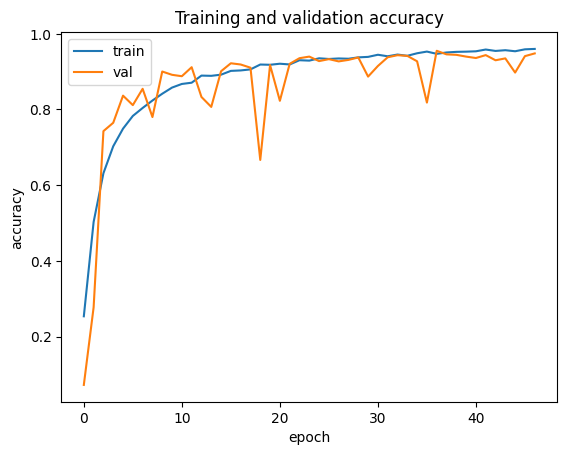

In [23]:
#plotting accuracy of model
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Text(0.5, 0, 'epoch')

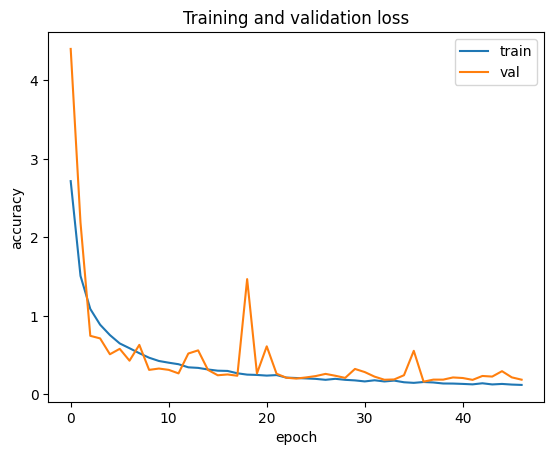

In [24]:
# plotting loss of model
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [26]:
test_loss, test_accuracy = model2.evaluate(test_imgs, test_labels_onehot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9498 - loss: 0.1696
Test Loss: 0.17841242253780365
Test Accuracy: 0.949999988079071


In [35]:
# Make predictions
predictions = model2.predict(test_imgs)
predicted_labels = np.argmax(predictions, axis=1)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [38]:
y_true_classes = np.argmax(test_labels_onehot, axis=1)  
print(classification_report(y_true_classes, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       240
           1       0.94      1.00      0.97       120
           2       0.96      0.97      0.97       120
           3       0.96      0.93      0.95       120
           4       0.92      0.94      0.93       120
           5       0.90      0.96      0.93       120
           6       0.99      0.99      0.99       240
           7       0.99      0.94      0.97       120
           8       0.99      0.95      0.97       120
           9       0.98      0.94      0.96       120
          10       1.00      0.99      1.00       120
          11       0.97      0.98      0.98       120
          12       0.85      0.96      0.90       120
          13       1.00      0.86      0.92       120
          14       0.86      1.00      0.92       120
          15       0.95      0.96      0.95       120
          16       0.96      0.97      0.96       120
          17       0.96    

In [36]:
for label in predicted_labels:
    print(label)

1
3
19
2
16
8
22
0
6
12
21
4
23
10
24
18
8
7
15
12
7
23
12
7
0
5
14
7
6
6
23
25
21
25
25
14
1
5
8
5
1
18
6
3
16
3
17
0
25
20
12
3
23
19
0
18
14
11
9
1
0
23
16
10
19
18
24
0
8
1
5
8
15
21
23
12
5
16
10
9
20
16
1
11
7
7
8
8
20
19
23
24
11
0
7
0
0
8
9
0
25
25
10
0
4
6
7
19
11
10
0
2
14
12
20
13
0
0
20
22
9
15
18
2
18
21
1
17
5
2
12
17
22
5
19
7
19
16
2
24
22
15
21
17
11
9
8
22
25
12
3
16
22
18
6
2
2
20
17
13
12
15
2
25
19
0
3
1
6
14
6
11
14
7
23
0
9
24
6
12
4
13
20
23
0
10
24
5
15
17
10
22
6
7
11
5
25
6
8
5
14
22
3
12
3
8
9
8
21
9
25
6
13
18
6
6
5
14
9
17
5
16
14
20
0
0
13
0
24
25
7
16
7
25
16
6
4
5
0
9
16
14
25
18
13
25
21
9
4
5
0
0
14
20
1
20
18
25
22
6
6
11
25
5
7
4
2
9
8
18
0
6
11
11
5
16
18
20
6
2
0
12
12
16
9
20
18
4
4
24
21
19
6
25
18
0
0
15
0
10
9
0
18
3
14
17
0
22
0
12
19
21
5
9
21
0
0
11
9
18
23
9
6
12
6
14
17
14
2
3
21
5
12
4
15
0
6
5
11
15
14
9
13
11
7
8
17
10
20
2
16
21
16
4
14
23
25
14
1
0
13
12
19
12
24
1
6
10
14
25
4
2
20
19
16
4
8
4
14
6
4
9
0
13
0
22
5
25
1
22
13
25
0
17

In [29]:
#Convert the predicted labels back to their original class labels
predicted_class_labels = label_encoder.inverse_transform(predicted_labels)
for label in predicted_class_labels:
    print(label)

alef
dad
teh
beh
seen
jeem
waw
ain
hah
noon
theh
dal
yeh
lam
zah
tah
jeem
heh
sad
noon
heh
yeh
noon
heh
ain
feh
reh
heh
hah
hah
yeh
zain
theh
zain
zain
reh
alef
feh
jeem
feh
alef
tah
hah
dad
seen
dad
sheen
ain
zain
thal
noon
dad
yeh
teh
ain
tah
reh
meem
kaf
alef
ain
yeh
seen
lam
teh
tah
zah
ain
jeem
alef
feh
jeem
sad
theh
yeh
noon
feh
seen
lam
kaf
thal
seen
alef
meem
heh
heh
jeem
jeem
thal
teh
yeh
zah
meem
ain
heh
ain
ain
jeem
kaf
ain
zain
zain
lam
ain
dal
hah
heh
teh
meem
lam
ain
beh
reh
noon
thal
qaf
ain
ain
thal
waw
kaf
sad
tah
beh
tah
theh
alef
sheen
feh
beh
noon
sheen
waw
feh
teh
heh
teh
seen
beh
zah
waw
sad
theh
sheen
meem
kaf
jeem
waw
zain
noon
dad
seen
waw
tah
hah
beh
beh
thal
sheen
qaf
noon
sad
beh
zain
teh
ain
dad
alef
hah
reh
hah
meem
reh
heh
yeh
ain
kaf
zah
hah
noon
dal
qaf
thal
yeh
ain
lam
zah
feh
sad
sheen
lam
waw
hah
heh
meem
feh
zain
hah
jeem
feh
reh
waw
dad
noon
dad
jeem
kaf
jeem
theh
kaf
zain
hah
qaf
tah
hah
hah
feh
reh
kaf
sheen
feh
seen
reh
thal
ain
ain
qaf
ain
zah


In [30]:
#Evaluate the model's performance by comparing the predicted labels with the true labels
true_labels = test_df['Label'].values
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.0


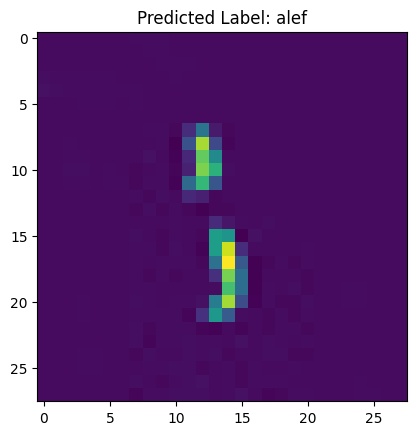

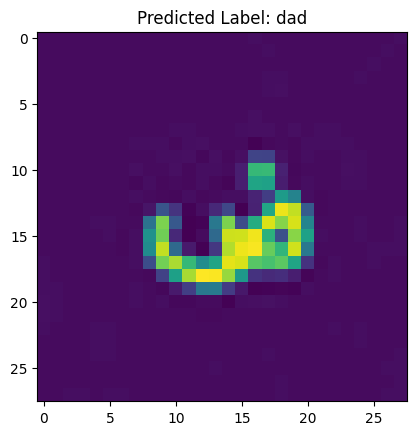

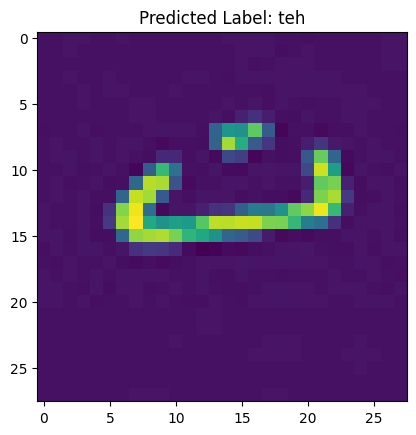

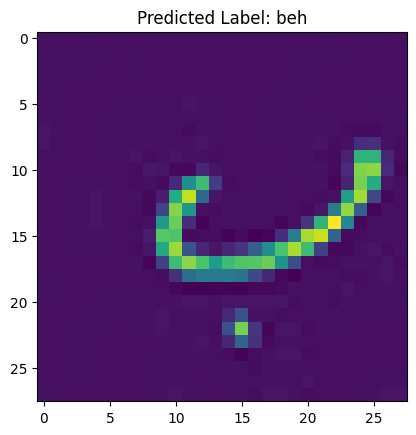

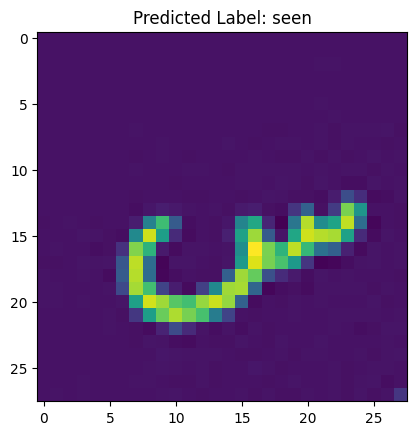

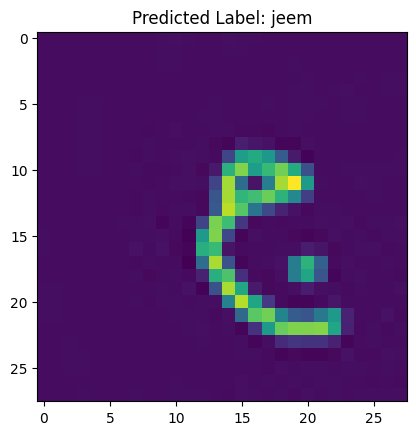

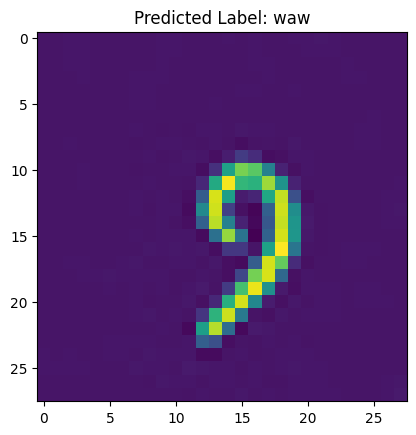

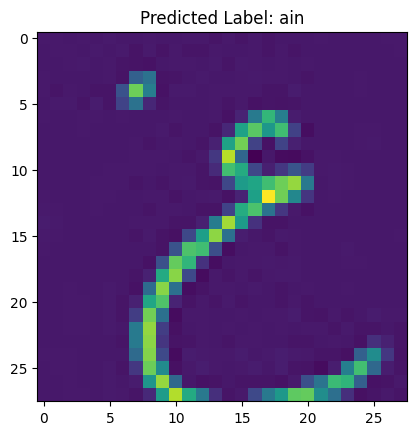

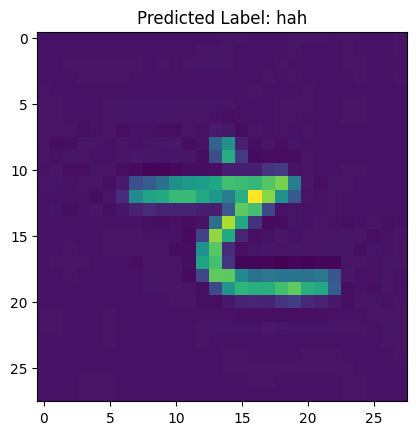

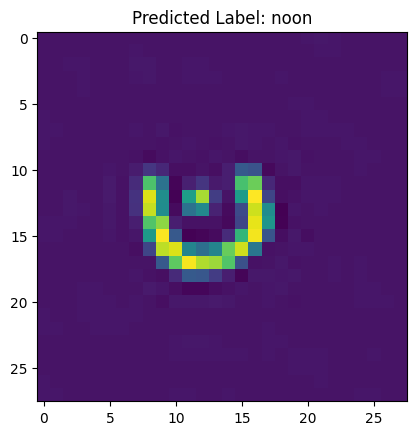

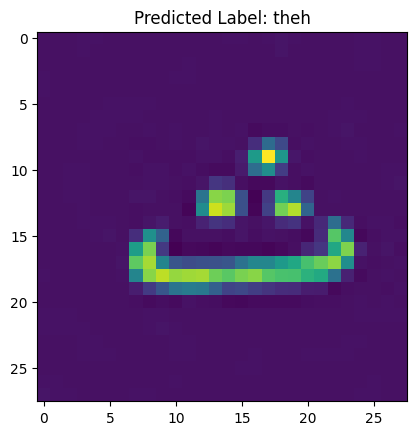

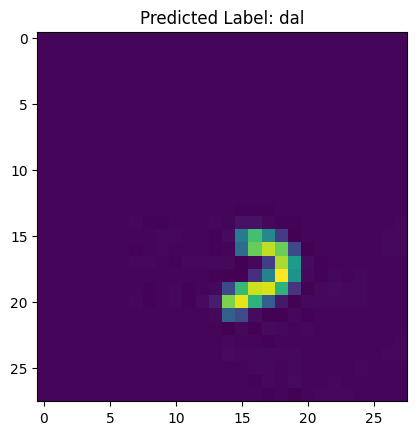

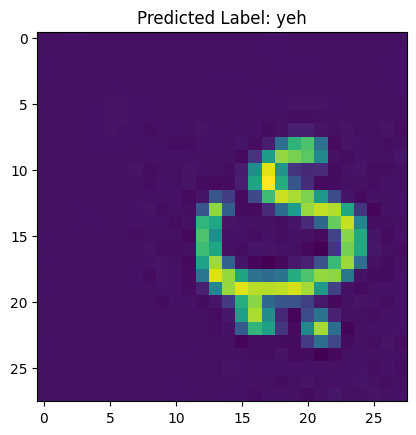

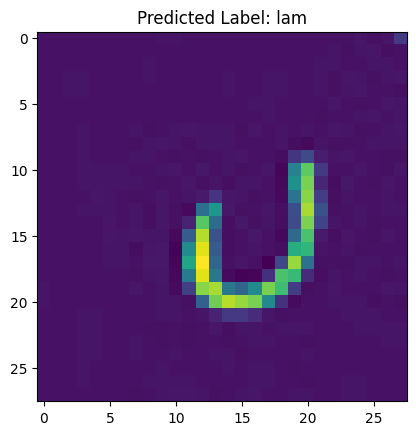

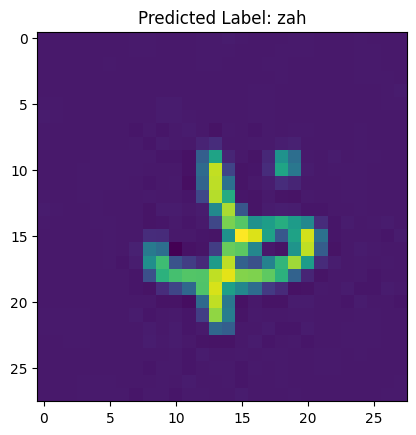

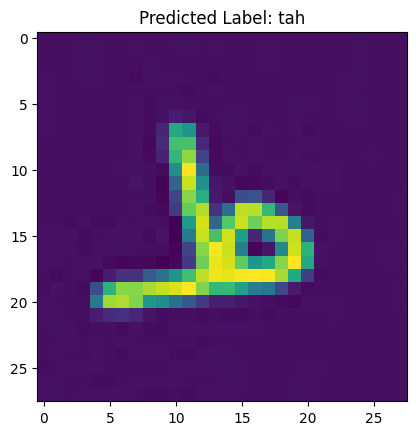

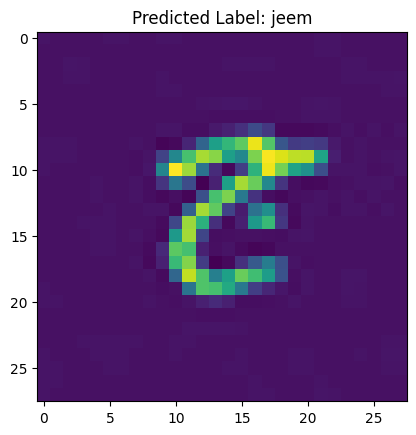

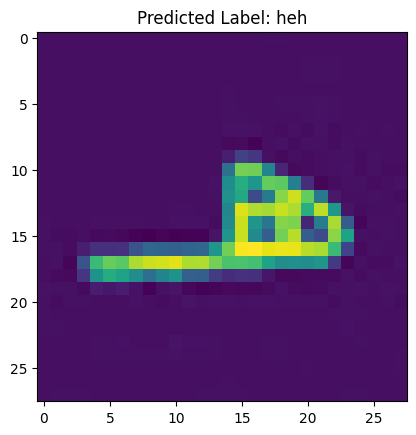

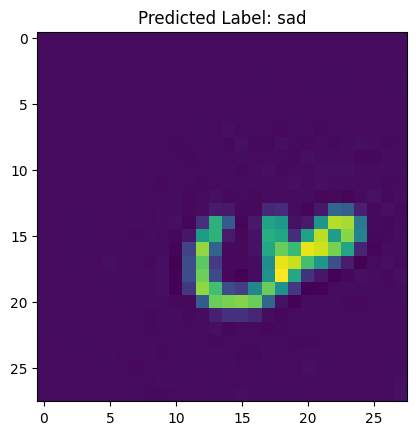

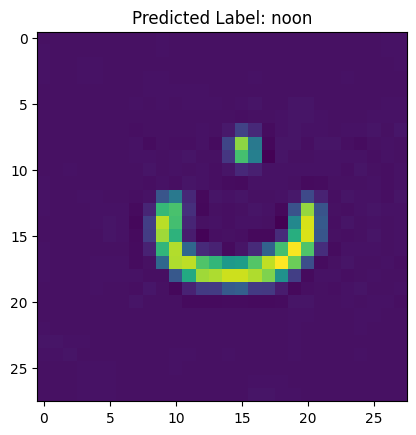

In [31]:
#Visualize a few test images along with their predicted labels
num_visua = 20
for i in range(num_visua):
    image = test_imgs[i]
    label = predicted_class_labels[i]
    plt.imshow(image)
    plt.title("Predicted Label: " + label)
    plt.show()